# Лабораторная работа 3. Оптимизация функции ценности. Методы SARSA и Q-Learning


В этой лабораторной работе мы изучим базовый, классический подход к обучению агентов - так называемый TD (Time difference) подход, с помощью которого будем оптимизировать функцию полезности. Рассмотрим методы SARSA и Q-Learning.
<br /><br />
В прошлой лабораторной работе мы с вами познакомились со стратегиями - функциями, которые на основе состояния определяют дальнейшее действие. Мы увидели, что задачи обучения с подкреплением можно решить путем подбора оптимальной стратегии.
<br /><br />

Однако, помимо стратегии, в обучении с подкреплением существуют и другие функции. Самая важный класс функций - функции полезности - $Q({\pi}, s, a)$ и $V({\pi}, s)$
<br /><br />
Здесь и далее {\pi} - стратегия, s - текущее состояние (наблюдение); a - действие, которое принимаем в текущем состоянии; s' - последующее состояние; a' - действие, которое будем принимать в последующем состоянии.

Что представляют собой эти функции (если не строго)?
<br /><br />
$V({\pi}, s) = r(r{s_i + {\gamma}{r_i} + {\gamma}^2{r_{i+1}}} + ...)$
<br /><br />
$Q({\pi}, s, a) = r(r{s_i + {\gamma}{r_i} + {\gamma}^2{r_{i+1}}} + ...)$
<br /><br />
Функция V показывает, какую выгоду мы получим, если находясь в текущем состоянии начнем действовать до конца с текущей стратегией. При этом, при подсчете функции мы ориентируемся на награду, которая и позволяет нам судить о полезности каждого состояния.
<br /><br />
Функция Q показывает, какую выгоду мы получим, если находясь в текущем состоянии <b>сначала примем действие a, а потом начнем действовать в соответствии со стратегией</b>.

Вы спросите: что такое гамма ($\gamma$)? Это важный гиперпараметр, который называется <b>коэффициентом дисконтирования</b>. Он выбирается от 0 до 1. Его смысл в том, что действия в далеком будущем не так значимы для агента, как ближайшие действия.

Таким образом, мы можем для каждой пары (состояние, действие) посчитать его полезность. Построить матрицу полезности (Q-матрицу). И уже по этой матрице (выбирая действие с максимальной полезностью) агент будет решать свою задачу.

Рассматриваемые в данной работе методы SARSA и Q-Learning основываются на оптимизации функции полезности Q. Отличаются они формулами, по которым происходит изменение ячейки Q-матрицы.

Остается разобраться еще с одним моментом. Понятно, как будет проходить обучение: агент будет выбирать действие с максимальным значением q (максимум в строке матрицы). Далее он будет обновлять это значение по одной из формул (зависит от метода - SARSA или Q-Learning).

Проблема в том, что это теоретически приведет нас не к глобальной, а к локальной оптимизации. На примере - игра Frozen Lake из прошлой ЛР (в этот раз вы ее также увидите). Оптимизация функции Q так или иначе приведет к тому, что агент научится доходить до конца. Однако, никто не гарантирует, что это будет самый оптимальный путь (может быть, он будет ходить по кругу, а потом все-таки дойдет до финиша). Думаю, вы поняли.

Оказывается, что для решения этой проблемы достаточно не все время выбирать действие с максимальным значением полезноти, а иногда и действовать случайным образом (случайное действие выбирать). Например, с некоторой вероятностью $\epsilon$. А этот самый $\epsilon$ в ходе обучения постоянно уменьшать - агент ведь со временем приближает функцию Q к оптимуму, а значит что и доверять выбору максимального значения q можно уже больше.

Такой подход называется $\epsilon$-жадная стратегия (жадная, поскольку предполагется выбор лучшего варианта в данном состоянии - также работают и жадные алгоритмы, вспомните предмет Алгоритмы).

Теперь осталось написать формулы обновления ячеек Q-матрицы.
<br /><br />
Для метода SARSA:
$Q(s, a) = Q(s, a) + \alpha[r_t+{\gamma}Q(s', a')-Q(s, a)]$ 
<br /><br />
Для метода Q-Learning:
$Q(s, a) = Q(s, a) + \alpha[r_t+{\gamma}max(Q(s', a'))-Q(s, a)]$ 

Здесь $\alpha$ - это скорость обучения (learning rate). Его смысл точно такой такой же, как и при обучении нейронных сетей. И точно также он находится в диапазоне [0, 1].

Сделаем следующим образом. Реализуем метод SARSA в окружении Frozen Lake из прошлой лабораторной работы, а Q-Learning реализуем в новом окружении Mountain Car (там пространство состояний непрерывно - посмотрим, что делать в этом случае).

### Важно!
Мы используем версию gym 0.25.1. В случае установки из pip более свежей версии возможны изменения в вызовах методов библиотеки. Актуально для тех, кто работает в PyCharm.

Установка зависимостей для визуализации окружений в Google Colab

In [ ]:
!apt-get install -y xvfb python-opengl
!pip install gym pyvirtualdisplay
!pip install pygame

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  freeglut3
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl xvfb
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,355 kB of archives.
After this operation, 8,005 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 1,355 kB in 0s (8,781 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 123941 f

Импортируем библиотеку OpenAI Gym и зависимость для работы с дисплеем

In [ ]:
from IPython import display as ipythondisplay
import gym
import matplotlib.pyplot as plt
import numpy as np

Настраиваем виртуальный дисплей (будем его позже использовать для визуализации окружений)

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Определяем функцию, которую будем использовать для визуализации текущего состояния окружения

In [ ]:
def visualize(env):
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

## Знакомство с окружением

In [ ]:
from gym.envs.toy_text.frozen_lake import generate_random_map

env = gym.make('FrozenLake-v1', desc=generate_random_map(size=5), is_slippery=False)
print(f"Пространство наблюдений: {env.observation_space}")
print(f"Пространство действий: {env.action_space}")

Пространство наблюдений: Discrete(25)
Пространство действий: Discrete(4)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


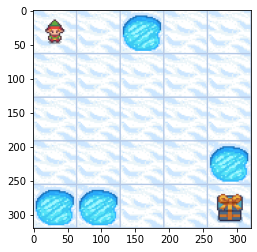

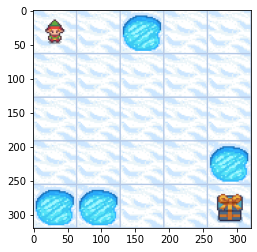

In [ ]:
env.reset()
visualize(env)

## SARSA

Инициализируем гиперпараметры

In [ ]:
epsilon = 0.95 # тот самый эпсилон - вероятность, что будем выбирать действие случайным образом
n_games = 10000 # количество игр (эпизодов)
alpha = 0.2 # скорость обучения
gamma = 0.9 # коэффициент дисконтирования
epsilon_decay = 0.0001 # величина, на которую мы на каждом шаге будем уменьшать эпсилон
min_epsilon = 0.01 # минимальный эпсилон (при достижении этого значения мы не будем уменьшать)

Теперь создадим матрицу Q из нулей

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n))# создайте матрицу Q из нулей (размеры - количество состояний на количество действий)

Можем начинать обучение

In [ ]:
for game in range(n_games):
  t = 0
  current_state = env.reset()
  if np.random.uniform(0, 1) < epsilon:
    current_action = env.action_space.sample()  # выберите случайное действие
  else:
    current_action = np.argmax(Q[current_state])  # возьмите действие с максимальным значением полезности
      
  while True: 
    next_state, reward, done, info = env.step(current_action) # выполните текущее действие
  
    next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(Q[next_state])  # выберите следующее действие (в следующем состоянии) аналогично тому, как выбирали текущее действие в текущем состоянии (epsilon-жадная стратегия)
          
    Q[current_state, current_action] = Q[current_state, current_action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[current_state, current_action])  # обновите значение полезности по формуле SARSA
  
    current_state = next_state
    current_action = next_action
          
    if done:
      break
  # уменьшите эпсилон либо оставьте его, если он уже минимальный
  if epsilon > min_epsilon: epsilon = epsilon - epsilon_decay

Посмотрим, какая получилась матрица Q

In [ ]:
Q

array([[0.41398343, 0.47467165, 0.44511889, 0.40964377],
       [0.35102815, 0.51524346, 0.        , 0.34682367],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.32427458, 0.08702122, 0.15259355],
       [0.08821955, 0.16179195, 0.07672248, 0.07742243],
       [0.45542462, 0.49572115, 0.52169223, 0.39599324],
       [0.43540823, 0.56936905, 0.53896128, 0.4251572 ],
       [0.41285149, 0.64928732, 0.51090784, 0.        ],
       [0.40427712, 0.68034612, 0.30449709, 0.13801722],
       [0.47296612, 0.12849327, 0.25353239, 0.09164716],
       [0.49164332, 0.39974221, 0.57369365, 0.41520227],
       [0.47771606, 0.61039284, 0.62492782, 0.49726571],
       [0.53535736, 0.7013068 , 0.66648268, 0.57207271],
       [0.5667315 , 0.80915524, 0.53570778, 0.5031352 ],
       [0.68193829, 0.        , 0.29680727, 0.2439174 ],
       [0.29408969, 0.        , 0.39622877, 0.47867432],
       [0.38402068, 0.        , 0.70596259, 0.50146521],
       [0.62201746, 0.79881158,

Посмотрим, как наш агент научился искать путь к правому нижнему углу

In [ ]:
sum_rewards = 0
state = env.reset()
print("Новая игра")
while True:
  action = np.argmax(Q[state])
  next_state, reward, done, info = env.step(action)
  state = next_state
  print(state)
  sum_rewards += reward
  if done:
    break

Новая игра
5
6
11
12
17
22
23
24


Видим, что обучение прошло успешно! Вы можете убедиться в этом, проанализировав действия агента в окружении (напоминаю про документацию к данному окружению: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)

## Q-Learning и непрерывное пространство наблюдений

Теперь займемся Q-Learning, но попробуем решить другое окружение - MountainCar (https://www.gymlibrary.dev/environments/classic_control/mountain_car/)

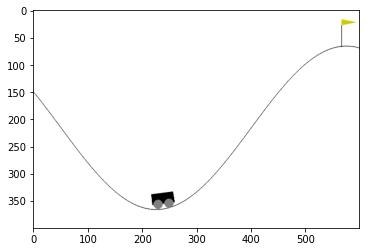

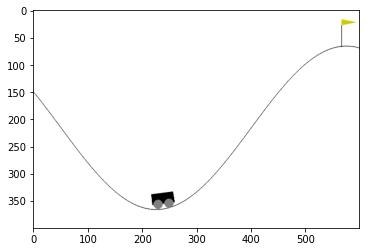

In [ ]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
env.reset()
visualize(env)

In [ ]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

Посмотрим, как выглядит начальное состояние

In [ ]:
env.reset()

array([-0.518158,  0.      ], dtype=float32)

In [ ]:
env.action_space

Discrete(3)

Действия у нас 3: 0 - ускориться влево, 1 - ничего не делать (поддаться физике), 2 - ускориться вправо

Мы видим, что у данного окружения состояние задается вектором, элементами которого являются [координата x, скорость]. Не обращайте внимание на числа на рисунке - окружение живет своей жизнью, и там изначально машинка стоит в случайной начальной координате

Давайте дискретизируем непрерывные величины с помощью np.linspace

In [ ]:
pos_len = 100; vel_len = 100;

position_space_discrete = np.linspace(-1.2, 0.6, 100)  # поделите отрезок (-1.2, 0.6) на столько частей, сколько хотите
velocity_space_discrete = np.linspace(-0.07, 0.07, 100)  # поделите отрезок (-0.07, 0.07) на столько частей, сколько хотите

In [ ]:
position_space_discrete

array([-1.2       , -1.18181818, -1.16363636, -1.14545455, -1.12727273,
       -1.10909091, -1.09090909, -1.07272727, -1.05454545, -1.03636364,
       -1.01818182, -1.        , -0.98181818, -0.96363636, -0.94545455,
       -0.92727273, -0.90909091, -0.89090909, -0.87272727, -0.85454545,
       -0.83636364, -0.81818182, -0.8       , -0.78181818, -0.76363636,
       -0.74545455, -0.72727273, -0.70909091, -0.69090909, -0.67272727,
       -0.65454545, -0.63636364, -0.61818182, -0.6       , -0.58181818,
       -0.56363636, -0.54545455, -0.52727273, -0.50909091, -0.49090909,
       -0.47272727, -0.45454545, -0.43636364, -0.41818182, -0.4       ,
       -0.38181818, -0.36363636, -0.34545455, -0.32727273, -0.30909091,
       -0.29090909, -0.27272727, -0.25454545, -0.23636364, -0.21818182,
       -0.2       , -0.18181818, -0.16363636, -0.14545455, -0.12727273,
       -0.10909091, -0.09090909, -0.07272727, -0.05454545, -0.03636364,
       -0.01818182,  0.        ,  0.01818182,  0.03636364,  0.05

In [ ]:
velocity_space_discrete

array([-0.07      , -0.06858586, -0.06717172, -0.06575758, -0.06434343,
       -0.06292929, -0.06151515, -0.06010101, -0.05868687, -0.05727273,
       -0.05585859, -0.05444444, -0.0530303 , -0.05161616, -0.05020202,
       -0.04878788, -0.04737374, -0.0459596 , -0.04454545, -0.04313131,
       -0.04171717, -0.04030303, -0.03888889, -0.03747475, -0.03606061,
       -0.03464646, -0.03323232, -0.03181818, -0.03040404, -0.0289899 ,
       -0.02757576, -0.02616162, -0.02474747, -0.02333333, -0.02191919,
       -0.02050505, -0.01909091, -0.01767677, -0.01626263, -0.01484848,
       -0.01343434, -0.0120202 , -0.01060606, -0.00919192, -0.00777778,
       -0.00636364, -0.00494949, -0.00353535, -0.00212121, -0.00070707,
        0.00070707,  0.00212121,  0.00353535,  0.00494949,  0.00636364,
        0.00777778,  0.00919192,  0.01060606,  0.0120202 ,  0.01343434,
        0.01484848,  0.01626263,  0.01767677,  0.01909091,  0.02050505,
        0.02191919,  0.02333333,  0.02474747,  0.02616162,  0.02

Воспользуемся методом digitize из numpy, чтобы по непрерывному значению предсказывать "ячейку", куда попало число

In [ ]:
np.digitize(-1.000346, position_space_discrete)

11

Аналогично мы можем делать и для скорости машинки. А это значит, что мы можем полностью перейти к дискретному пространству состояний

In [ ]:
actions = [0, 1, 2]
states = []
for position in range(pos_len):
  for velocity in range(vel_len):
    states.append((position, velocity))

In [ ]:
Q = {state: [0 for _ in actions] for state in states}
# заполните нулями значения словаря

In [ ]:
Q

Получили функцию Q в виде словаря. Теперь можно приступить к обучению. Параметры те же самые

In [ ]:
n_games = 3000 # количество игр (эпизодов)
epsilon = 1 # тот самый эпсилон - вероятность, что будем выбирать действие случайным образом
alpha = 0.1 # скорость обучения
gamma = 0.9 # коэффициент дисконтирования
epsilon_decay = 2 / n_games # величина, на которую мы на каждом шаге будем уменьшать эпсилон
min_epsilon = 0.01 # минимальный эпсилон (при достижении этого значения мы не будем уменьшать)

Напишем вспомогательные функции

In [ ]:
def to_discrete(state):
  # с помощью digitize сформируйте кортеж из двух элементов (это ячейки, куда попала позиция и скорость)
  # верните этот кортеж из функции
  return np.digitize(state[0], position_space_discrete), np.digitize(state[1], velocity_space_discrete)

In [ ]:
def get_action_with_max_q(state):
  # верните из функции действие (число) с максимальной полезностью в данном состоянии
  return np.argmax(Q[state])

In [ ]:
sum_reward = 0

for game in range(n_games):
  t = 0
  # current_state = to_discrete(env.reset()) # ошибка?????? тут не должно быть to_discrete иначе дальеш падает всё
  current_state = env.reset()
  if game % 100 == 0 and game > 0:
            print('Игра: ', game, 'Награда за игру: ', sum_reward, 'Эпсилон %.3f' % epsilon)

  sum_reward = 0
  while True: 
    current_state_discrete = to_discrete(current_state)  # дискретизируйте состояние
    if np.random.uniform(0, 1) < epsilon:
      current_action = env.action_space.sample()
    else:
      current_action = np.argmax(Q[current_state_discrete])

    next_state, reward, done, info = env.step(current_action)
    next_state_discrete = to_discrete(next_state) # дискретизируйте состояние
    # next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(Q[next_state_discrete])  # выберите действие с максимальной полезностью (вспомните вашу функцию)
    next_action = get_action_with_max_q(next_state_discrete)

    Q[current_state_discrete][current_action] = Q[current_state_discrete][current_action] + alpha * (reward + gamma * Q[next_state_discrete][next_action] - Q[current_state_discrete][current_action])  # обновите значение полезности
    
    current_state = next_state
    current_action = next_action
    sum_reward += reward

    if done:
      break
  # уменьшите эпсилон, либо оставьте его, если он уже минимальный
  if epsilon > min_epsilon: epsilon = epsilon - epsilon_decay

Игра:  100 Награда за игру:  -1000.0 Эпсилон 0.933
Игра:  200 Награда за игру:  -1000.0 Эпсилон 0.867
Игра:  300 Награда за игру:  -1000.0 Эпсилон 0.800
Игра:  400 Награда за игру:  -1000.0 Эпсилон 0.733
Игра:  500 Награда за игру:  -1000.0 Эпсилон 0.667
Игра:  600 Награда за игру:  -1000.0 Эпсилон 0.600
Игра:  700 Награда за игру:  -879.0 Эпсилон 0.533
Игра:  800 Награда за игру:  -808.0 Эпсилон 0.467
Игра:  900 Награда за игру:  -1000.0 Эпсилон 0.400
Игра:  1000 Награда за игру:  -1000.0 Эпсилон 0.333
Игра:  1100 Награда за игру:  -778.0 Эпсилон 0.267
Игра:  1200 Награда за игру:  -914.0 Эпсилон 0.200
Игра:  1300 Награда за игру:  -963.0 Эпсилон 0.133
Игра:  1400 Награда за игру:  -321.0 Эпсилон 0.067
Игра:  1500 Награда за игру:  -582.0 Эпсилон 0.010
Игра:  1600 Награда за игру:  -695.0 Эпсилон 0.010
Игра:  1700 Награда за игру:  -677.0 Эпсилон 0.010
Игра:  1800 Награда за игру:  -672.0 Эпсилон 0.010
Игра:  1900 Награда за игру:  -451.0 Эпсилон 0.010
Игра:  2000 Награда за игру:  -1

In [ ]:
rewards = []

games_count = 100

for _ in range(games_count):
  sum_rewards = 0
  state = env.reset()
  # print("Новая игра")
  while True:
    action = get_action_with_max_q(to_discrete(state))
    next_state, reward, done, info = env.step(action)
    state = next_state
    sum_rewards += reward

    if done:
      rewards.append(sum_rewards)
      
      # print(sum_rewards)
      break

rewards = np.array(rewards) + 1000.0

print(np.count_nonzero(rewards)/len(rewards))

0.94


---

**Пояснение**: я не стал делать визуализацию для данной задачи. критерием успешного выполнения агентом задачи (то есть что агент заехал на гору) я выбрал суммарную награду: она должна быть больше чем -1000 (за каждый шаг в нетерминальное состояние награда даётся -1, лимит шагов 1000). далее я отыграл 100 игр и в 94 играх из 100 агент завершил работу с наградой больше чем -1000, то есть успешно выполнил свою задачу.

---

В этом окружении мы получаем награду -1 за каждый шаг, пока машинка не на вершине горы. При этом игра завершается, если координата по x равна 0.45 (это вершина горы).

Мы установили максимальное количество шагов 1000. Таким образом, если мы решаем задачу за менее чем 1000 шагов (то есть получаем награду >1000), это значит, что агент достиг своей цели.

Можно увидеть, что агент сформировал оптимальную матрицу Q. При этом, за счет случайной начальной координаты и скорости, агенту не всегда удается решить свою задачу.

Тем не менее, здесь есть большое количество параметров, которые можно подобрать, чтобы повысить качество обучения (начать стоит с параметров дискретизации - на сколько частей мы разбиваем отрезки)

## Задания лабораторной работы

### Основные задания

1. Заполнить пропуски в ячейках, добиться рабочего кода для метода SARSA. <b> 3 балла </b>
2. Заполнить пропуски в ячейках, добиться рабочего кода для метода Q-Learning. <b> 3 балла </b>
<br /><br />
Итого з лабораторную работу: 6 баллов.

### Замечания

1. Выполнять задания можно в Google Colab или локально в среде Jupiter Notebook. При выполнении задания локально не требуется настройка и установка зависимостей для виртуального дисплея (и использование кастомной функции visualize). При вызове метода env.render создастся окно с визуализацией.